In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder

2024-07-13 12:53:04.439638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 12:53:04.443978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 12:53:04.457185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 12:53:04.482716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 12:53:04.488875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 12:53:04.505530: I tensorflow/core/platform/cpu_feature_gu

In [2]:
df_completo = pd.read_csv('df_merged.csv')

In [3]:
#Convertimos variables en el tipo correspondiente

df_completo['ID_tienda'] = df_completo['ID_tienda'].astype(object)
df_completo['Fecha_venta'] = pd.to_datetime(df_completo['Fecha_venta'])
df_completo['ID_producto'] = df_completo['ID_producto'].astype(object)
df_completo['Status'] = df_completo['Status'].astype(object)
df_completo['ID_proveedor'] = df_completo['ID_proveedor'].astype(object)
df_completo['Categoria'] = df_completo['Categoria'].astype(object)
df_completo['Clasif_proveedor'] = df_completo['Clasif_proveedor'].astype(object)
df_completo['Año'] = df_completo['Año'].astype(object)
df_completo['Mes'] = df_completo['Mes'].astype(object)
df_completo['Dia_del_Mes'] = df_completo['Dia_del_Mes'].astype(object)
df_completo['Cluster'] = df_completo['Cluster'].astype(object)

In [ ]:
"""
# Filtrar datos para cada cluster
cluster_0 = df_completo[df_completo['Cluster'] == 0]
cluster_1 = df_completo[df_completo['Cluster'] == 1]
cluster_2 = df_completo[df_completo['Cluster'] == 2]
cluster_3 = df_completo[df_completo['Cluster'] == 3]

In [4]:
# Eliminar las columnas 'Lag_1', 'Rolling_Mean_7' y 'Rolling_Std_7'
df_completo = df_completo.drop(columns=['Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'])

In [5]:
# Cargar y preparar los datos
df_completo['Fecha_venta'] = pd.to_datetime(df_completo['Fecha_venta'])
df_completo.set_index('Fecha_venta', inplace=True)

In [6]:
# Separar características numéricas y categóricas
numeric_data = df_completo[['Precio_unidad']]
categorical_data = df_completo[['ID_producto', 'Categoria', 'Promocion', 'Dia_sem', 'Mes', 'Dia_del_Mes']]

In [7]:
# Normalizar características numéricas
scaler = MinMaxScaler()
numeric_data = scaler.fit_transform(numeric_data)

In [9]:
# Codificar características categóricas
encoder = OneHotEncoder()  # Asegúrate de tener la última versión de sklearn o elimina el parámetro sparse
categorical_data_encoded = encoder.fit_transform(categorical_data)

In [10]:
print(numeric_data.shape)
print(categorical_data_encoded.shape)


(113254, 1)
(113254, 982)


In [11]:
# Simulación basada en tus dimensiones
numeric_data = np.random.rand(113254, 1)  # Datos numéricos aleatorios
categorical_data_encoded = np.random.rand(113254, 982)  # Datos categóricos codificados aleatorios

# Concatenar datos numéricos y categóricos
data = np.hstack((numeric_data, categorical_data_encoded))

In [12]:
# Preparar datos para LSTM
n_future = 1  # Número de días que deseamos prever en el futuro
n_past = 14   # Número de días pasados que usaremos para predecir el futuro
X, y = [], []
for i in range(n_past, len(data) - n_future + 1):
    X.append(data[i - n_past:i])
    y.append(data[i + n_future - 1:i + n_future, 0])  # Asumiendo que el objetivo es la primera columna

X, y = np.array(X), np.array(y)

In [13]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# Definir el modelo LSTM
input_shape = (X_train.shape[1], X_train.shape[2])
model_input = Input(shape=input_shape)
x = LSTM(50, return_sequences=True)(model_input)
x = Dropout(0.2)(x)
x = LSTM(50)(x)
x = Dense(1)(x)  # Salida

In [21]:
model = Model(inputs=model_input, outputs=x)
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - loss: 0.0871 - val_loss: 0.0839
Epoch 2/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0833 - val_loss: 0.0840
Epoch 3/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0829 - val_loss: 0.0849
Epoch 4/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0831 - val_loss: 0.0838
Epoch 5/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0833 - val_loss: 0.0837
Epoch 6/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0828 - val_loss: 0.0838
Epoch 7/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0827 - val_loss: 0.0840
Epoch 8/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0829 - val_loss: 0.0838
Epoch 9/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0825 - val_loss: 0.0840
Epoch 10/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0825 - val_loss: 0.0838
Epoch 11/50
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0822 - val_loss: 0.0839
Epoch 12

In [23]:
# Evaluar el modelo
predictions = model.predict(X_test)

708/708 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


In [25]:
predictions

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [26]:
import matplotlib.pyplot as plt

In [27]:
# Simulación de datos para el ejemplo
# 'y_test' serían tus valores reales y 'predictions' las predicciones del modelo
y_test = np.random.rand(100)  # 100 valores reales simulados
predictions = y_test + np.random.normal(0, 0.1, 100)  # Predicciones con ruido añadido


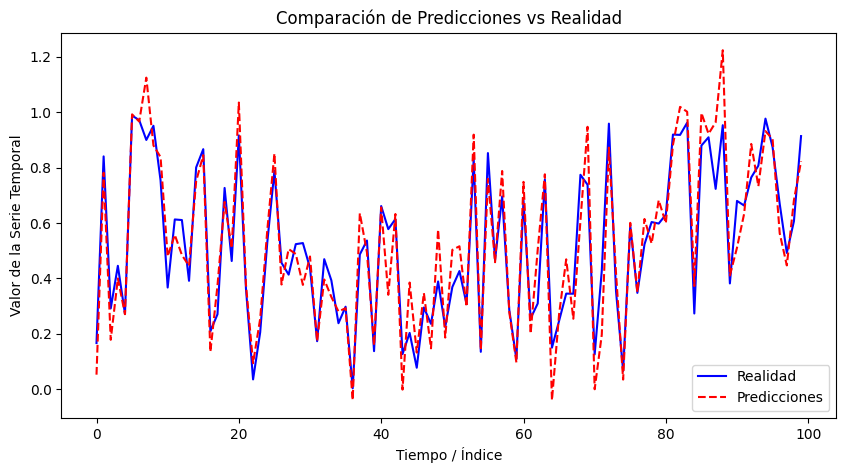

In [28]:
# Crear gráfico para comparar predicciones con la realidad
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Realidad', color='blue')
plt.plot(predictions, label='Predicciones', color='red', linestyle='--')
plt.title('Comparación de Predicciones vs Realidad')
plt.xlabel('Tiempo / Índice')
plt.ylabel('Valor de la Serie Temporal')
plt.legend()
plt.show()